In [ ]:
1 Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do 
  obiektu DataFrame.
2 Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji
  według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej 
  (‘signs_of_mental_illness’).
3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar 
  interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich 
  charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
4 Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według 
  odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były 
  uszeregowane od poniedziałku do niedzieli.
5 Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące 
  skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu 
  incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców
  każdego ze stanów.

In [ ]:
# https://www.youtube.com/watch?v=wzN1UyfRSWI # Some youtube material on joining DFs

In [1]:
import pandas as pd

In [2]:
# 1 Download database and import it to the DataFrame

In [125]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [126]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
# 2 Modify DataFrameto show number of intervention based on race and signs_of_mental_illness

In [305]:
dfGl =df.groupby(['race','signs_of_mental_illness']).size()
dfGl
dfSt =df.groupby(['state']).size().to_frame()
print(dfSt.head())

         0
state     
AK      39
AL     104
AR      83
AZ     254
CA     799


In [29]:
# 3 Using Map, Applymap lub Apply add a column with percentage of mental illness cases per race

In [7]:
dfGr =df.groupby(['race']).size()
type(dfGr)
dfGr

race
A      93
B    1298
H     902
N      78
O      48
W    2476
dtype: int64

In [63]:
#pd.merge(dfGl, dfGr, how ='inner', on ='race')
#dfGl.join(dfGr, on ='race')
# This doesn't work

In [64]:
type(dfGl['B'])

pandas.core.series.Series

In [58]:
# dfres = dfGr.join(dfGl, on ='race',lsuffix ="_x",rsuffix ="_y")
# it doesn't work
# new idea convert Series into Data Frame objects and merge them...

In [21]:
DFGL = dfGl.to_frame()
DFGR = dfGr.to_frame()

In [60]:
print(type(DFGR))
print(type(DFGL))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
DFGR.reset_index(inplace = True) # I'm creating a new index 
DFGL.reset_index(inplace = True) # I'm creating a new index 

In [61]:
print(DFGL)
print(DFGR)

   race  signs_of_mental_illness  Part
0     A                    False    69
1     A                     True    24
2     B                    False  1114
3     B                     True   184
4     H                    False   745
5     H                     True   157
6     N                    False    64
7     N                     True    14
8     O                    False    37
9     O                     True    11
10    W                    False  1763
11    W                     True   713
  race  Total
0    A     93
1    B   1298
2    H    902
3    N     78
4    O     48
5    W   2476


In [62]:
inner = pd.merge(DFGL,DFGL)
inner 

,race,signs_of_mental_illness,Part
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745
5,H,True,157
6,N,False,64
7,N,True,14
8,O,False,37
9,O,True,11


In [50]:
DFGR.rename(columns = {0:'Total'}, inplace = 'True')
DFGR

,race,Total
0,A,93
1,B,1298
2,H,902
3,N,78
4,O,48
5,W,2476


In [65]:
DFGL.rename(columns = {0:'Part'}, inplace = 'True')
DFGL

,race,signs_of_mental_illness,Part
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745
5,H,True,157
6,N,False,64
7,N,True,14
8,O,False,37
9,O,True,11


In [69]:
inner = pd.merge(DFGL,DFGR, on ='race')
inner 

,race,signs_of_mental_illness,Part,Total
0,A,False,69,93
1,A,True,24,93
2,B,False,1114,1298
3,B,True,184,1298
4,H,False,745,902
5,H,True,157,902
6,N,False,64,78
7,N,True,14,78
8,O,False,37,48
9,O,True,11,48


In [76]:
def percentage(row):
    percent = row['Part']/row['Total']
    
    if row['signs_of_mental_illness'] == True:
        return percent
    else:
        return 0

In [77]:
inner['percent'] = inner.apply(lambda row: percentage(row), axis = 1)
inner

,race,signs_of_mental_illness,Part,Total,percent
0,A,False,69,93,0.000000
1,A,True,24,93,0.258065
2,B,False,1114,1298,0.000000
3,B,True,184,1298,0.141757
4,H,False,745,902,0.000000
5,H,True,157,902,0.174058
6,N,False,64,78,0.000000
7,N,True,14,78,0.179487
8,O,False,37,48,0.000000
9,O,True,11,48,0.229167


In [ ]:
#inner['percent']= round(inner['Part']/inner['Total'],2) # another method simply opereationg on the DF

In [79]:
# 4  Add column with an interventions' day of the week. Count interventions based on the weekday.
#    Create a bar diagram so that the interventions are ordered from Monday till Sunday

In [105]:
df['Weekday'] = pd.to_datetime(df['date']).dt.day_name()

In [155]:
weekdays = df.groupby([pd.to_datetime(df['date']).dt.day_of_week,pd.to_datetime(df['date']).dt.day_name()]).count()#['births'].sum()
weekdays

,,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,date,,,,,,,,,,,,,,
0,Monday,726,726,726,726,698,700,726,671,726,726,726,726,696,726
1,Tuesday,816,816,816,816,781,789,815,735,816,816,816,816,770,816
2,Wednesday,829,829,829,829,787,785,829,758,829,829,829,829,790,829
3,Thursday,810,810,810,810,785,775,810,734,810,810,810,810,767,810
4,Friday,761,761,761,761,729,715,761,674,761,761,761,761,722,761
5,Saturday,721,721,721,721,687,695,720,648,721,721,721,721,691,721
6,Sunday,753,753,753,753,722,722,753,675,753,753,753,753,731,753


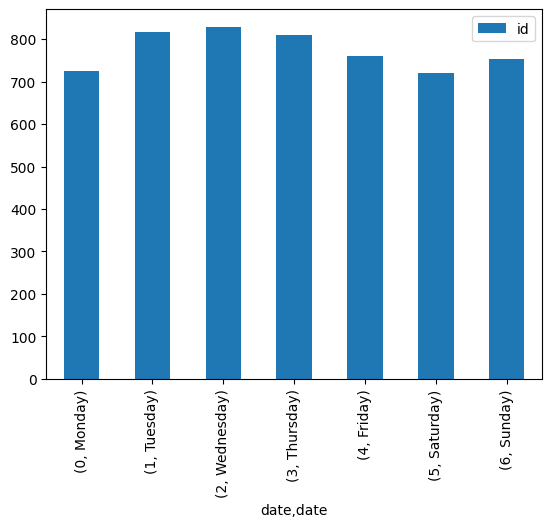

In [161]:
ax = weekdays.plot.bar(y='id')

In [163]:
# 5 Import data of the USA population in the states and join the two tables so you can count deadly
# interventions per 1000 people

In [ ]:
#https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population
#https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations

In [164]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [169]:
popstate = data[0]
popstate

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019 [2]","Census population, April 1, 2010 [3]","Percent change, 2010–2019 [note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019 [note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018 [note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,3.0,New York,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,4.0,Florida,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,5.0,Illinois,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,6.0,Pennsylvania,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [238]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header = 1)
#print(type(data[0]))
dict = data[0]

In [284]:
#print(dict[10:20])
dictState = dict[['Codes:','Unnamed: 3']]
dictState.rename(columns = {'Codes:':'DictState','Unnamed: 3':'DictCode'}, inplace = True)
print(dictState[9:12])


                   DictState DictCode
9   United States of America       US
10                   Alabama       AL
11                    Alaska       AK


C:\Users\Pogomac\AppData\Local\Temp\ipykernel_25068\11292871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dictState.rename(columns = {'Codes:':'DictState','Unnamed: 3':'DictCode'}, inplace = True)


In [285]:
combined = pd.merge(dictState,popstate, left_on ='DictState',right_on='State')
combined.rename(columns = {'Population estimate, July 1, 2019 [2]':'pop2019'},inplace = True)
combined = combined[['DictCode','DictState','pop2019']]
combined.head()

,DictCode,DictState,pop2019
0,AL,Alabama,4903185
1,AK,Alaska,731545
2,AZ,Arizona,7278717
3,AR,Arkansas,3017825
4,CA,California,39512223


In [304]:
perpop = pd.merge(dfSt,combined, left_on = 'state',right_on = 'DictCode')
perpop['per1000'] = perpop[0]/perpop['pop2019']*1000
perpop.sort_values(by='per1000', ascending = False).head()

,0,DictCode,DictState,pop2019,per1000
0,39,AK,Alaska,731545,0.053312
32,106,NM,New Mexico,2096829,0.050553
36,164,OK,Oklahoma,3956971,0.041446
3,254,AZ,Arizona,7278717,0.034896
5,195,CO,Colorado,5758736,0.033862
